In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('./Crop_recommendation.csv')
data.head(100)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [ ]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:>

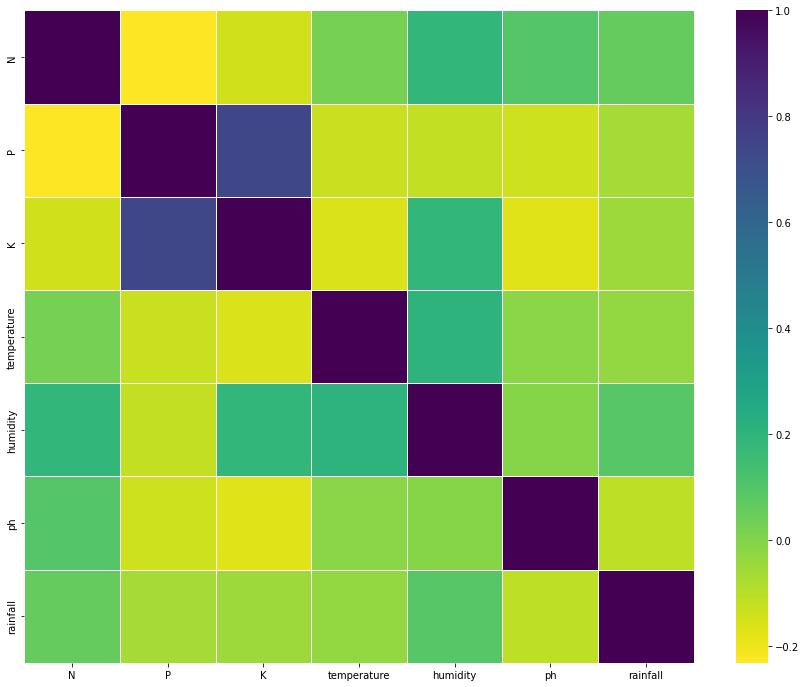

In [ ]:
f, ax = plt.subplots(figsize = (15, 12))
correlation = data.corr()
sns.heatmap(correlation, ax = ax, cmap = "viridis_r", linewidths=0.7)

In [ ]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [ ]:
X = data.drop("label", axis = 1)

In [ ]:
X.head(20)

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
5,69,37,42,23.058049,83.370118,7.073454,251.055000
6,69,55,38,22.708838,82.639414,5.700806,271.324860
7,94,53,40,20.277744,82.894086,5.718627,241.974195
8,89,54,38,24.515881,83.535216,6.685346,230.446236
9,68,58,38,23.223974,83.033227,6.336254,221.209196


### UNIVARIATE ANALYSIS

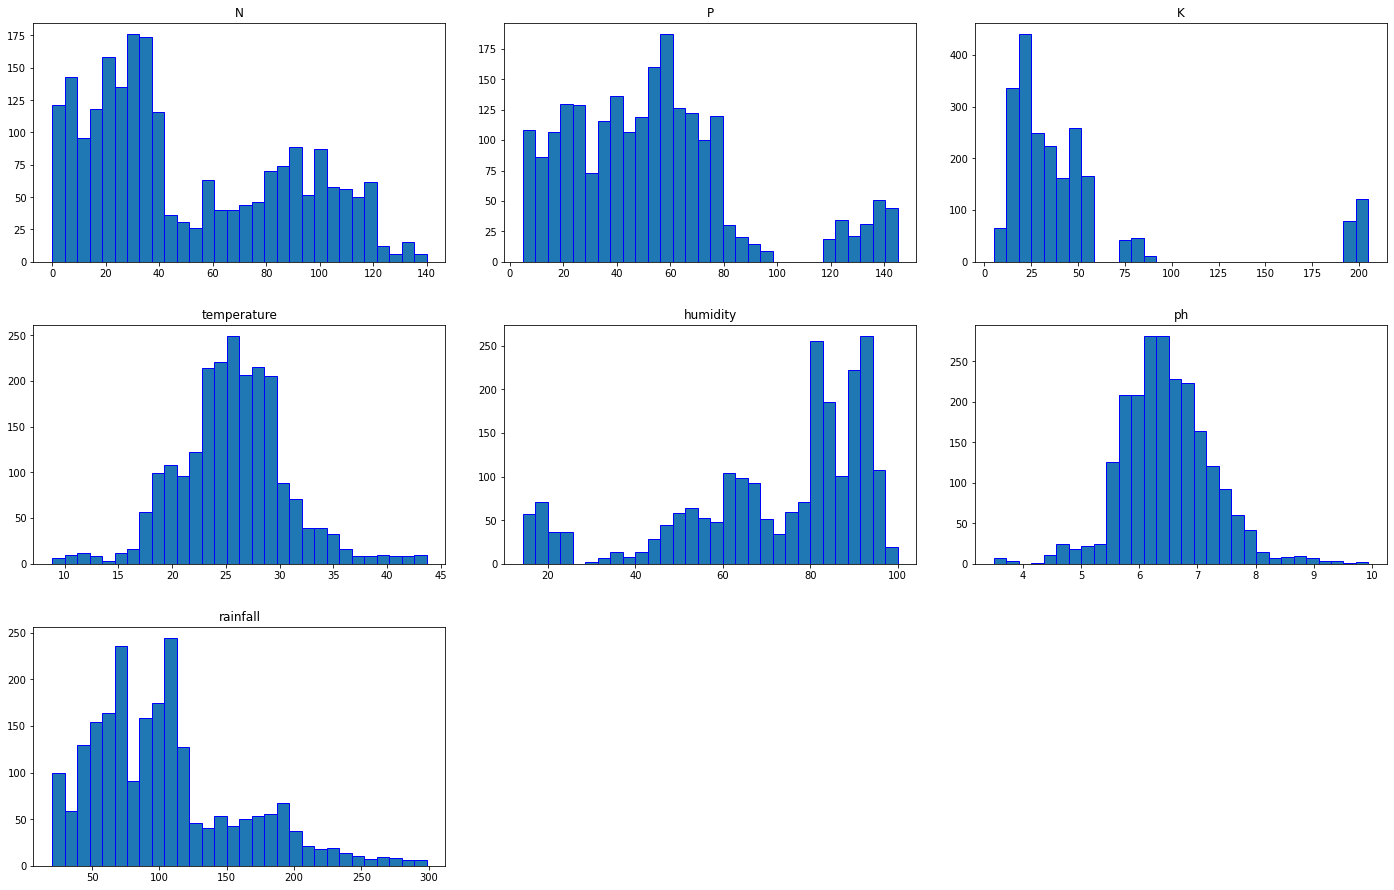

In [ ]:
all_cols = data.columns[ : -1]

plt.figure(figsize=(20,13))
for i in range(len(all_cols)):
    plt.subplot(3,3,i+1)
    plt.hist(data[all_cols[i]], bins = 30, edgecolor = 'b')
    plt.title(all_cols[i])
plt.tight_layout(pad = 3)

### MULTIVARIATE ANALYSIS

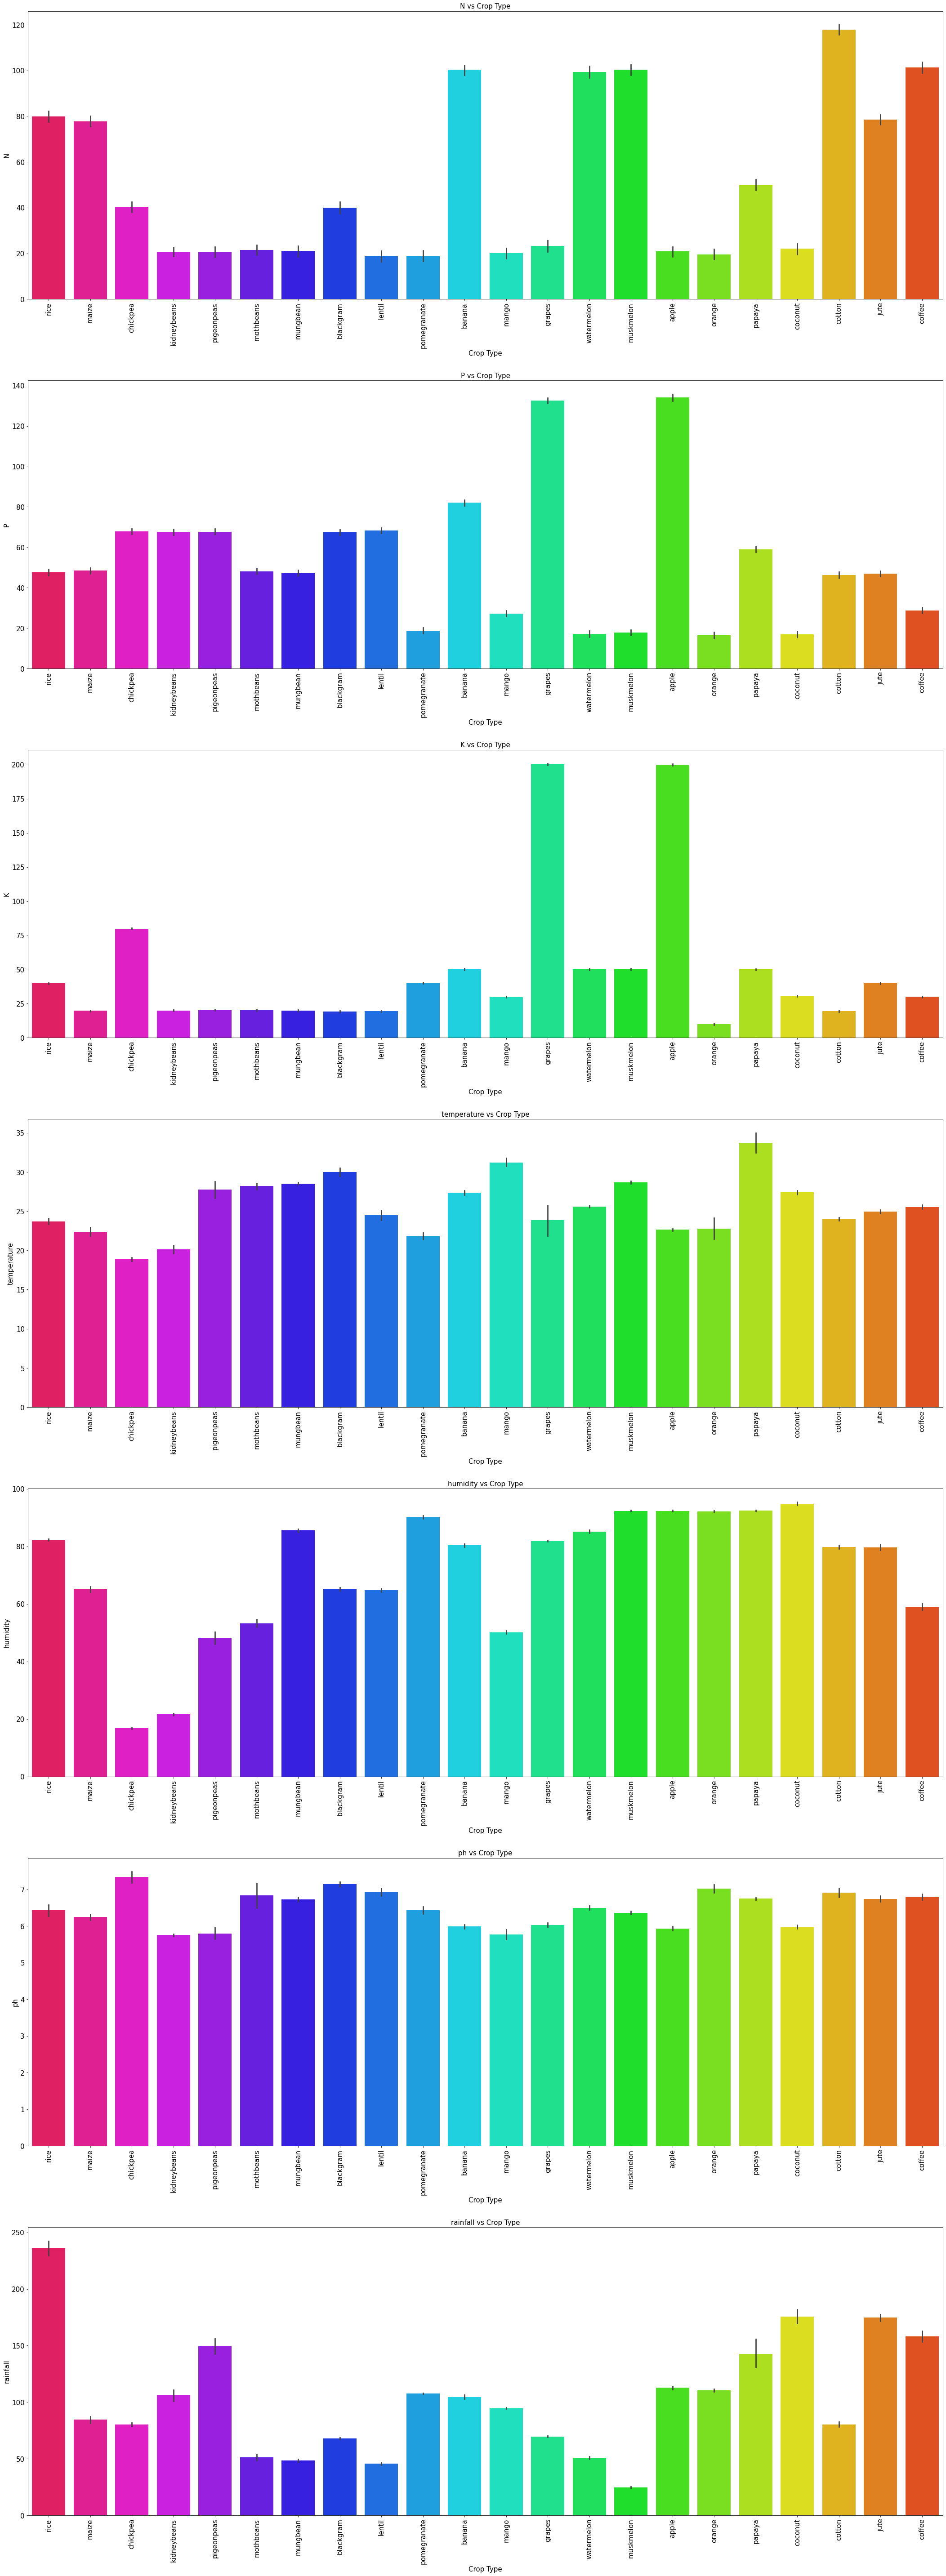

In [ ]:
plt.figure(figsize = (30,90))
for i in range(len(all_cols)):
    plt.subplot(8,1,i+1)
    barplot = sns.barplot(x = "label", y = all_cols[i], palette="hsv_r", data = data)
    barplot.set_xlabel("Crop Type", fontsize = 15)
    barplot.set_ylabel(f"{all_cols[i]}", fontsize = 15)
    plt.xticks(fontsize = 15, rotation = 90)
    plt.yticks(fontsize = 15)
    plt.title(f"{all_cols[i]} vs Crop Type", fontsize = 15)

plt.tight_layout(pad = 3.5)


In [ ]:
sum_of_min = data['N'] + data['P'] + data['K']
data["Total Minerals"] = sum_of_min

In [ ]:
data.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label,Total Minerals
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,175
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,184
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,159
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,149
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,162
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice,148
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice,162
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice,187
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice,181
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice,164


In [ ]:
mineral_mean = data.groupby("label")[["K","P","N","Total Minerals"]].mean()
mineral_mean

,K,P,N,Total Minerals
label,,,,
apple,199.89,134.22,20.80,354.91
banana,50.05,82.01,100.23,232.29
blackgram,19.24,67.47,40.02,126.73
chickpea,79.92,67.79,40.09,187.80
coconut,30.59,16.93,21.98,69.50
coffee,29.94,28.74,101.20,159.88
cotton,19.56,46.24,117.77,183.57
grapes,200.11,132.53,23.18,355.82
jute,39.99,46.86,78.40,165.25


<AxesSubplot:xlabel='label'>

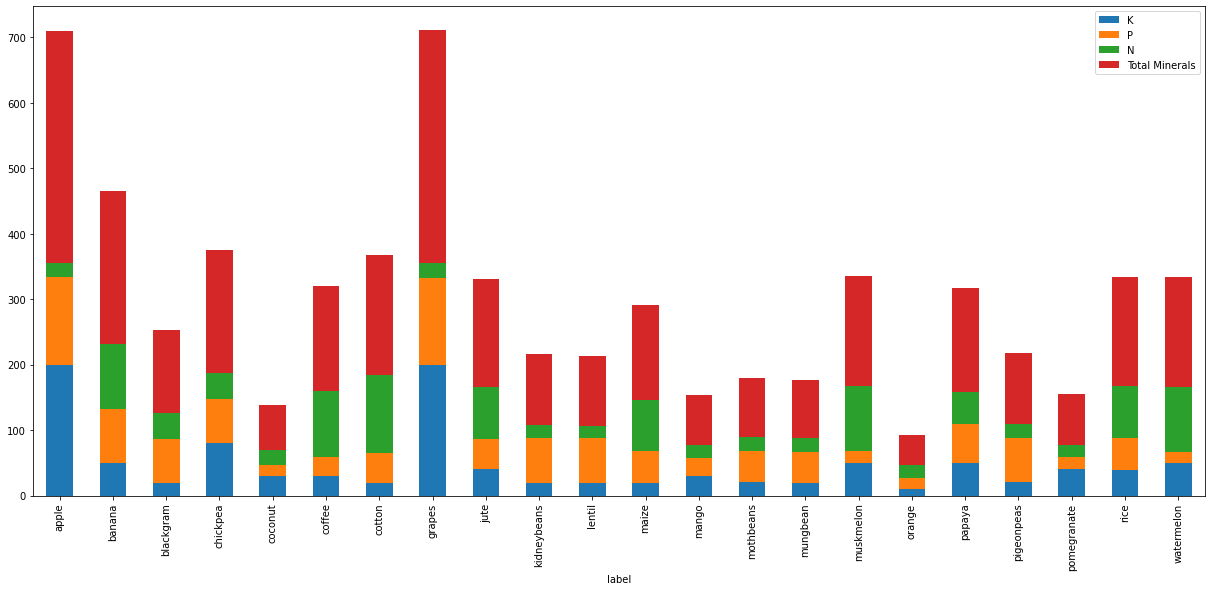

In [ ]:
mineral_mean.plot(figsize = (21,9), kind = "bar", stacked = True)

### CONVERTING DATA TO NUMERIC FORM

1. Label Encoding
2. One Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder as LE

In [ ]:
le = LE()

In [ ]:
data['label'] = le.fit_transform(data['label'])

data.head()

,N,P,K,temperature,humidity,ph,rainfall,label,Total Minerals
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20,175
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20,184
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20,159
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20,149
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20,162


In [ ]:
model_accuracy = dict()

In [ ]:
print(X)

        N   P   K  temperature   humidity        ph    rainfall
0      90  42  43    20.879744  82.002744  6.502985  202.935536
1      85  58  41    21.770462  80.319644  7.038096  226.655537
2      60  55  44    23.004459  82.320763  7.840207  263.964248
3      74  35  40    26.491096  80.158363  6.980401  242.864034
4      78  42  42    20.130175  81.604873  7.628473  262.717340
...   ...  ..  ..          ...        ...       ...         ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507
2196   99  15  27    27.417112  56.636362  6.086922  127.924610
2197  118  33  30    24.131797  67.225123  6.362608  173.322839
2198  117  32  34    26.272418  52.127394  6.758793  127.175293
2199  104  18  30    23.603016  60.396475  6.779833  140.937041

[2200 rows x 7 columns]


#### DROPPING OFF THE TARGET VALUE (i.e. "label")

In [ ]:
X = data.drop("label", axis = 1)
Y = data['label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0, test_size = 0.2)

### FEATURE SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#### LOGISTIC REGRESSION

In [ ]:
lgr = LogisticRegression(random_state = 0)
lgr.fit(X_train, Y_train)

#Predicting the test set results
Y_pred = lgr.predict(X_test)

#Accuracy
lgr_acc = accuracy_score(Y_test, Y_pred)
model_accuracy.update({'Logistic Regression' : lgr_acc})

#### SUPPORT VECTOR MACHINE (SVM)

In [ ]:
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = svc.predict(X_test)

# Accuracy 
svc_acc = accuracy_score(Y_test, Y_pred)
model_accuracy.update({'SVM' : svc_acc})

### K-Nearest Neighbours

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = knn.predict(X_test)

# Accuracy 
knn_acc = accuracy_score(Y_test, Y_pred)
model_accuracy.update({'KNN' : knn_acc})

### Neural Network or MLP

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=[205,205],activation='relu', alpha=0.001)
mlp.fit(X_train, Y_train)

#Predicting the Test set results
Y_pred = mlp.predict(X_test)

#Accuray
mlp_acc = accuracy_score(Y_test, Y_pred)
#model_accuracy.update({'Neural Network' : mlp_acc})

C:\Users\prach\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### Naive Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

# Predicting the Test set results
Y_pred = gnb.predict(X_test)

# Accuracy 
nb_acc = accuracy_score(Y_test, Y_pred)
model_accuracy.update({'Naive Bayes' : nb_acc})

#### Random Forest

In [ ]:
rfc = RandomForestClassifier(max_depth = 12)
rfc.fit(X_train, Y_train)

#Predicting the Test set results
Y_pred = rfc.predict(X_test)

#Accuracy
rf_acc = accuracy_score(Y_test, Y_pred)
model_accuracy.update({"Random Forest" : rf_acc})

## HYPERPARAMETER TUNNING

#### Tunned Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
'''rf = RandomForestClassifier(random_state=1)
param_grid =  {'n_estimators': [100,500,1000], 
                                  'bootstrap': [True,False],
                                  'max_depth': [3,5,10,20,50,75,100,None],
                                  'max_features': ['auto','sqrt'],
                                  'min_samples_leaf': [1,2,4,10],
                                  'min_samples_split': [2,5,10]}
                                  
rf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)
best_rf_rnd=rf_rnd.fit(X_train,Y_train)'''
#model_accuracy.update({'Tunned Random Forest': best_rf_rnd.best_score_})

"rf = RandomForestClassifier(random_state=1)\nparam_grid =  {'n_estimators': [100,500,1000], \n                                  'bootstrap': [True,False],\n                                  'max_depth': [3,5,10,20,50,75,100,None],\n                                  'max_features': ['auto','sqrt'],\n                                  'min_samples_leaf': [1,2,4,10],\n                                  'min_samples_split': [2,5,10]}\n                                  \nrf_rnd = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 100, cv = 5, verbose = True, n_jobs = -1)\nbest_rf_rnd=rf_rnd.fit(X_train,Y_train)"

#### Tunned SVM

In [ ]:
'''svc = SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [0.001,.01,0.1,1],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.001, .01, .1, 1, 10]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,Y_train)
#model_accuracy.update({'Tunned SVM': best_rf_rnd.best_score_})'''

"svc = SVC()\nparam_grid = [{'kernel': ['rbf'], 'gamma': [0.001,.01,0.1,1],\n                                  'C': [.1, 1, 10, 100, 1000]},\n                                 {'kernel': ['linear'], 'C': [.001, .01, .1, 1, 10]}]\nclf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)\nbest_clf_svc = clf_svc.fit(X_train,Y_train)\n#model_accuracy.update({'Tunned SVM': best_rf_rnd.best_score_})"

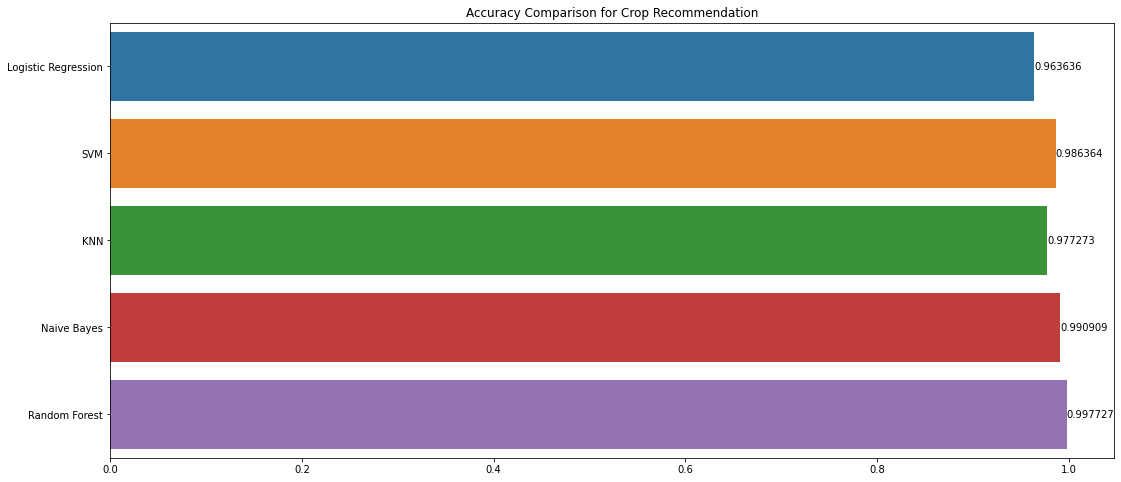

In [ ]:
plt.figure(figsize=(18,8))
ax = sns.barplot(y = [k for k in model_accuracy], x = [model_accuracy[k] for k in model_accuracy])
ax.bar_label(ax.containers[0])
plt.title('Accuracy Comparison for Crop Recommendation')
plt.show()